## Esitmate an integral

$$
\alpha = \int_0^1 f(x) dx
$$

$$
\hat{\alpha}_n = \frac{1}{n} \sum_{i=1}^n f(U_i) \mbox{ with } U_i \mbox{ random } \in [0..1]
$$

The error is normal distributed with mean 0 and standard deviation $\sigma_f/\sqrt{n}$

$\sigma_f$ can be estimated 

$$
s_f = \sqrt{\frac{1}{n-1}\sum_{i=1}^n \left( f(U_i) - \hat{\alpha}_n \right)^2}
$$

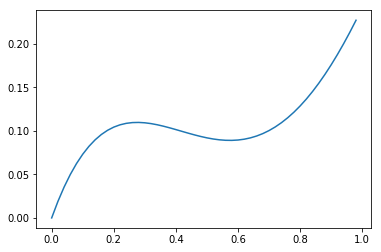

In [10]:
from math import sin
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def f(x):
    return np.sin(x)-3*x**2+3.4*x**3-x**4

X = np.arange(0,1,0.02)
Y = f(X) 
plt.plot(X,Y)

In [36]:
np.random.seed(123)
n = 2000000
X = np.random.random(n)
Z = np.random.standard_normal(n)
Y = f(X)
res = sum(Y)/n
print('n:',n)
print('int:',res)


E = Y-res
E2 = E*E
sf = sum(E2)/(n-1)



print('sf:',sf)

n: 2000000
int: 0.109705947738
sf: 0.00182594659295


## Result 

$
\int_0^1 \sin(x)-3*x^2+3.4*x^3-x^4 dx = 0.109698
$

http://www.wolframalpha.com/input/?i=int+sin(x)-3*x**2%2B3.4*x**3-x**4++from+0+to+1

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          1.00000000e+01,   7.00000000e+00,   1.40000000e+01,
          1.20000000e+01,   1.70000000e+01,   2.70000000e+01,
          1.70000000e+01,   2.30000000e+01,   4.20000000e+01,
          4.10000000e+01,   6.10000000e+01,   6.60000000e+01,
          8.90000000e+01,   8.70000000e+01,   1.16000000e+02,
          1.39000000e+02,   1.67000000e+02,   1.96000000e+02,
          2.82000000e+02,   2.76000000e+02,   3.36000000e+02,
          3.77000000e+02,   4.60000000e+02,   5.05000000e+02,
          5.91000000e+02,   6.73000000e+02,   7.77000000e+02,
          9.31000000e+02,   1.09500000e+03,   1.22700000e+03,
          1.39500000e+03,   1.61800000e+03,   1.88500000e+03,
        

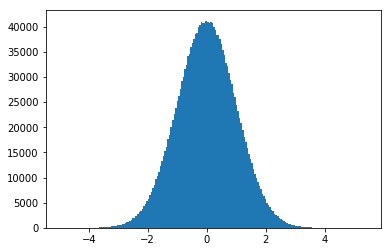

In [38]:
plt.hist(Z,200)

## payoff

$S(t)$ prize of stock at time t

call option granting the holder the right to buy the stock at a fixed price K 

payoff at $T$ $\max\{0,S(T)-K\}$

present Payoff:

Factor: $e^{ - r T}$ with $r$ the continuously compounded interest rate.

## Evolution of stock explained with Black-Scholes model

$$
\frac{dS(t)}{S(T)} = r dt + \sigma dW(t)
$$

W a standard Brownian motion

A solution: 

$$
S(T) = S(0) \exp \left( \left[r - \frac{1}{2}\sigma^2 \right]T + \sigma W(T) \right)
$$

with Z as a standard normal random variable (mean 0, variance 1)

$$
S(T) = S(0) \exp \left( \left[r - \frac{1}{2}\sigma^2 \right]T + \sigma \sqrt{T} Z \right)
$$


The logarithm of the stock price is thus normally distributed, and the stock price itself has a lognormal distribution.

The expectation leads to Blackshoels formula BS(S,$\sigma$,T,r,K) =

## American Stock options

### Variable Declarations

$\hat{h}_i$: payoff function at $t_i$

$\hat{V}_i(x)$ the value of the option at $t_i$ with $X_i$ = x

We are nterested in $\hat{V}_0(X_0)$.


This value is determined recursively:

$\hat{V}_m(x) = \hat{h}_m(x)$

$\hat{V}_{i-1}(x) = \max \{ \hat{h}_{i-1}(x), E \left[ D_{i-1,i}(X_i) \hat{V}_i(X_i)| X_{i-1} = x\right]  \} $

for $i=1, \cdots, m$

 $D_{i-1,i}(X_i)$ discount factor from $t_{i-1}$ to $t_i$


conditional expectations is the main difficulty in pricing American options by simulation

$$
E \left[ D_{i-1,i}(X_i) \hat{V}_i(X_i)| X_{i-1} = x\right]  
$$

## Simplified dynamic programming recursion:

$V_m(x) = h_m(x)$

$V_{i-1}(x) = \max \{ h_{i-1}(x), E \left[ V_i(X_i)| X_{i-1} = x\right]  \} $






$\hat{V}_i(X_i)$ gives the value of the option in time-$t_i$ dollars

disount factor:

$$
h(x) = D_{0,i}(x) \hat{h}_i(x)
$$

$$
V_i(x) = D_{0,i}(x) \hat{V}_i(x)
$$

## stopping rule

$\tau$: stopping time

$X_0,X_1,\cdots,X_m$: Markov chain

$$
V_0^{(\tau)}(X_0) = E \left[ h_{\tau}(X_{\tau})\right]
$$

The stopping rule f can thus also be described as the first time the Markov chain Xi enters an exercise region. 


continuation value in state x at date ti

$$
C_i(x) = E \left[ V_{i+1}(X_{i+1}| X_i = x \right] \mbox{ with } i=0,\cdots,m-1
$$



$$
C_i(x) = E \left[ \max \{ h_{i+1}(X_{i+1}), C_{i+1}(X_{i+1}) \}| X_i = x \right] \mbox{ with } i=0,\cdots,m-1
$$


The value functions Vi determine the continuation values

$$
V_i(x) = \max \{ h_{i}(x), C_{i}(x) \}
$$

Step 1: Simulate nl independent replications X(j), j = 1, ... ,nl, of the Markov chain (Xo, Xl, ... ,Xm );

...

### Regression-Based Methods 

regression to estimate continuation values from simulated paths 

$C_i(x):  x \to V_{i+1}(X_{i+1}) \mbox{with } x = X_i$

$C_i$ by a linear combination of known functions of the current state and use regression 


$$
E \left[V_{i+1}(X_{i+1} | X_i = x \right] \sum_{r=1}^M \beta_{ir} \psi_r(x)$
$$


$$
C_i(x) = \beta_i^T \psi(x)
$$

with 

$$
\beta_i^T = (\beta_{i,1},\cdots,\beta_{i,M}) , \psi(x) = (\psi_1(x),\cdots,\psi_M(x) )^T 
$$

but to sim- plify notation we suppress any dependence of on i.


### stochastic mesh framework 


regression-based methods fit well within the stochastic mesh framework


we will see that the use of regression at each step corresponds to an implicit choice of weights for the mesh.

## Regression based algorithm

* Simulate $b$ independent paths $\{X_{1,j},... ,X_{m,j}\}$,  $j= 1,...,b$ of the Markov chain.
* At terminal nodes, set $\hat{V}_{m,j} = h_m(X_{m,j} )$, $j = 1, ... , b$.
* Apply backward induction: for $i = m - 1, ... ,1$

$$
\hat{V}_{i,j} = \max [ h_i(X_{i,j}), \hat{C}_i(X_{i,j}) ] , j=1,\cdots,b 
$$

with $\hat{C}_i =  \hat{\beta}_i^T \psi(x) $


Set $\hat{V}_0 = (\hat{V}_{1,1}+\cdots+\hat{V}_{1,b})/b$

array([1, 4, 9])